In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("D:/Data Science-ExcelR/Assignments/Logistic Regression/bank-full.csv")
print(df.head())

  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  58;"management";"married";"tertiary";"no";2143...                                                                                                  
1  44;"technician";"single";"secondary";"no";29;"...                                                                                                  
2  33;"entrepreneur";"married";"secondary";"no";2...                                                                                                  
3  47;"blue-collar";"married";"unknown";"no";1506...                                                                                                  
4  33;"unknown";"single";"unknown";"no";1;"no";"n...                                                                                                  


In [5]:
df1 =  pd.read_csv('D:/Data Science-ExcelR/Assignments/Logistic Regression/bank-full.csv', sep=';')
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
df2=pd.DataFrame(df1)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df2.drop(["age","job","marital","education","contact","day","month"], axis=1, inplace=True)
df2.head(3)

,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,no,2143,yes,no,261,1,-1,0,unknown,no
1,no,29,yes,no,151,1,-1,0,unknown,no
2,no,2,yes,yes,76,1,-1,0,unknown,no


In [8]:
df2 = pd.get_dummies(data=df2, columns=["default","housing","loan","poutcome"])
df2['Y'] = df2.y.map({'no':0,'yes':1})
df2.drop(["y"],axis=1, inplace=True)
df2.head()

,balance,duration,campaign,pdays,previous,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,Y
0,2143,261,1,-1,0,1,0,0,1,1,0,0,0,0,1,0
1,29,151,1,-1,0,1,0,0,1,1,0,0,0,0,1,0
2,2,76,1,-1,0,1,0,0,1,0,1,0,0,0,1,0
3,1506,92,1,-1,0,1,0,0,1,1,0,0,0,0,1,0
4,1,198,1,-1,0,1,0,1,0,1,0,0,0,0,1,0


In [9]:
df2.iloc[:,:].isnull().values.any()

False

In [10]:
df2 = df2[['Y','balance','duration','campaign','pdays','previous','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes','poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown']]
df2.head(2)

,Y,balance,duration,campaign,pdays,previous,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,2143,261,1,-1,0,1,0,0,1,1,0,0,0,0,1
1,0,29,151,1,-1,0,1,0,0,1,1,0,0,0,0,1


In [11]:
from sklearn.linear_model import LogisticRegression

x=df2.iloc[:,1:]
y=df2.iloc[:,0]

classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\Sures\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
classifier.score(x,y)
print("Model score : ",classifier.score(x,y))
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(classifier.predict(x),y)
print("confusion matrix :  ""\n",confusion_matrix(classifier.predict(x),y))

Model score :  0.8978567162858596
confusion matrix :  
 [[39107  3803]
 [  815  1486]]


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y,classifier.predict(x)))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     39922
           1       0.65      0.28      0.39      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.63      0.67     45211
weighted avg       0.88      0.90      0.88     45211



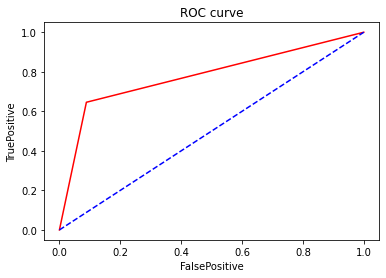

In [14]:
FalsePositive, TruePositive,_=roc_curve(classifier.predict(x),y,drop_intermediate=False)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(FalsePositive, TruePositive, color='red',label='ROC curve')
plt.plot([0, 1], [0, 1], color='blue',linestyle='--')
plt.xlabel('FalsePositive')
plt.ylabel('TruePositive')
plt.title('ROC curve')
plt.show()

In [15]:
y_pred = classifier.predict(x)
df1["yy"] = y_pred
df1['yy'] = df1.yy.map({0:'no',1:'yes'})
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,yy
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no


In [16]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))  
print(y_prob)

              0         1
0      0.957848  0.042152
1      0.972881  0.027119
2      0.989448  0.010552
3      0.977814  0.022186
4      0.874087  0.125913
...         ...       ...
45206  0.308424  0.691576
45207  0.741426  0.258574
45208  0.035091  0.964909
45209  0.758636  0.241364
45210  0.559019  0.440981

[45211 rows x 2 columns]


In [17]:
new_df = pd.concat([df1,y_prob], axis=1)
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,yy,0,1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,no,0.957848,0.042152
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,no,0.972881,0.027119
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,no,0.989448,0.010552
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,no,0.977814,0.022186
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,no,0.874087,0.125913


In [18]:
new_df.to_csv("Predcited Term deposit.csv")

In [19]:
pred=pd.read_csv('Predcited Term deposit.csv')

In [20]:
pred.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,...,month,duration,campaign,pdays,previous,poutcome,y,yy,0,1
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,...,may,261,1,-1,0,unknown,no,no,0.957848,0.042152
1,1,44,technician,single,secondary,no,29,yes,no,unknown,...,may,151,1,-1,0,unknown,no,no,0.972881,0.027119
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,...,may,76,1,-1,0,unknown,no,no,0.989448,0.010552
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,...,may,92,1,-1,0,unknown,no,no,0.977814,0.022186
4,4,33,unknown,single,unknown,no,1,no,no,unknown,...,may,198,1,-1,0,unknown,no,no,0.874087,0.125913
